In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

In [3]:
path_to_data = "../../Dataset/"

auc = pd.read_csv(os.path.join(path_to_data, "data_drug_treatment_auc.txt"), sep='\t')
patient = pd.read_csv(os.path.join(path_to_data, "data_clinical_patient.txt"), dtype=str, sep = '\t', skiprows=4)
samples = pd.read_csv(os.path.join(path_to_data, "data_clinical_sample.txt"), dtype=str, sep = '\t', skiprows=4)

In [4]:
auc.shape

(266, 1069)

In [5]:
samples.iloc[0]

SAMPLE_ID                                DMS53_LUNG
PATIENT_ID                               DMS53_LUNG
PURITY                                         0.99
PLOIDY                                         2.85
GENOME_DOUBLINGS                                  1
DEPMAPID                                 ACH-000698
NAME                                         DMS 53
SITE_OF_FINDING                                 NaN
SAMPLE_TYPE                                 Primary
PRIMARY_SITE                                   Lung
SITE_SUBTYPE1                                    NS
SITE_SUBTYPE2                                    NS
SITE_SUBTYPE3                                    NS
HIST_SUBTYPE1                  small_cell_carcinoma
HIST_SUBTYPE2                                    NS
HIST_SUBTYPE3                                    NS
ANNOTATION_SOURCE                              CCLE
CELL_LINE_SOURCE                               ATCC
CHARACTERISTICS                            Adherent
GROWTH_MEDIU

In [30]:
#only need one of these 
print(sum(patient['ETHNICITY'].isna()))
print(sum(patient['RACE'].isna()))

424
469


In [31]:
#
training = patient[['SEX','AGE', 'ETHNICITY']]
training.index = patient['PATIENT_ID']
training

,SEX,AGE,ETHNICITY
PATIENT_ID,,,
DMS53_LUNG,Male,54,Caucasian
SW1116_LARGE_INTESTINE,Male,73,Caucasian
NCIH1694_LUNG,Male,61,Caucasian
P3HR1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,Male,7,African_american
HUT78_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,Male,53,Caucasian
...,...,...,...
GEO_LARGE_INTESTINE,Na,NaN,NaN
NCIH2330_LUNG,Na,NaN,NaN
LP6_SOFT_TISSUE,Na,NaN,NaN


In [32]:
samples.columns

Index(['SAMPLE_ID', 'PATIENT_ID', 'PURITY', 'PLOIDY', 'GENOME_DOUBLINGS',
       'DEPMAPID', 'NAME', 'SITE_OF_FINDING', 'SAMPLE_TYPE', 'PRIMARY_SITE',
       'SITE_SUBTYPE1', 'SITE_SUBTYPE2', 'SITE_SUBTYPE3', 'HIST_SUBTYPE1',
       'HIST_SUBTYPE2', 'HIST_SUBTYPE3', 'ANNOTATION_SOURCE',
       'CELL_LINE_SOURCE', 'CHARACTERISTICS', 'GROWTH_MEDIUM', 'SUPPLEMENTS',
       'FREEZING_MEDIUM', 'DOUBLING_TIME_FROM_VENDOR', 'DOUBLING_TIME',
       'TUMOR_TYPE', 'TYPE_REFINED', 'PATHOLOGIST_ANNOTATION', 'MUTATION_RATE',
       'ONCOTREE_CODE', 'CANCER_TYPE', 'CANCER_TYPE_DETAILED',
       'PROTEOMICS_10PLEX_ID', 'PROTEOMICS_TMT_LABEL', 'TMB_NONSYNONYMOUS'],
      dtype='object')

In [33]:
#now add some sample data
common_ids = list(set(training.index).intersection(samples['SAMPLE_ID']))

doubling_time = {k:np.nan for k in training.index}
mutation = {k:np.nan for k in training.index}
ctype = {k:np.nan for k in training.index}
sites = {k:np.nan for k in training.index}

for sample_id in common_ids:
    doubling_time[sample_id] = samples[samples['SAMPLE_ID'] == sample_id]['DOUBLING_TIME'].to_numpy()[0]
    mutation[sample_id] = samples[samples['SAMPLE_ID'] == sample_id]['MUTATION_RATE'].to_numpy()[0]
    ctype[sample_id] = samples[samples['SAMPLE_ID'] == sample_id]['CANCER_TYPE'].to_numpy()[0]
    sites[sample_id] = samples[samples['SAMPLE_ID'] == sample_id]['PRIMARY_SITE'].to_numpy()[0]
    

In [34]:
training['DOUBLING_TIME'] = training.index.map(doubling_time)
training['MUTATION_RATE'] = training.index.map(mutation)
training['CANCER_TYPE'] = training.index.map(ctype)
training['PRIMARY_SITE'] = training.index.map(sites)
training

<ipython-input-34-cb31dfa78d42>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training['DOUBLING_TIME'] = training.index.map(doubling_time)
<ipython-input-34-cb31dfa78d42>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training['MUTATION_RATE'] = training.index.map(mutation)
<ipython-input-34-cb31dfa78d42>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

,SEX,AGE,ETHNICITY,DOUBLING_TIME,MUTATION_RATE,CANCER_TYPE,PRIMARY_SITE
PATIENT_ID,,,,,,,
DMS53_LUNG,Male,54,Caucasian,450,157.2416381,Small Cell Lung Cancer,Lung
SW1116_LARGE_INTESTINE,Male,73,Caucasian,123.2,94.37319183,Colorectal Cancer,Large_Intestine
NCIH1694_LUNG,Male,61,Caucasian,81.2,109.534987,Small Cell Lung Cancer,Lung
P3HR1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,Male,7,African_american,NaN,166.4564059,Mature B-Cell Neoplasms,Haematopoietic_And_Lymphoid_Tissue
HUT78_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,Male,53,Caucasian,NaN,118.2175686,T-Lymphoblastic Leukemia/Lymphoma,Haematopoietic_And_Lymphoid_Tissue
...,...,...,...,...,...,...,...
GEO_LARGE_INTESTINE,Na,NaN,NaN,NaN,NaN,Cancer of Unknown Primary,Na
NCIH2330_LUNG,Na,NaN,NaN,NaN,NaN,Cancer of Unknown Primary,Na
LP6_SOFT_TISSUE,Na,NaN,NaN,NaN,NaN,Cancer of Unknown Primary,Na


In [35]:
common_ids2 = list(set(training.index).intersection(auc.columns[4:]))
aucs = {k:np.nan for k in training.index}

for sample_id in common_ids2:
    #compute average and such 
    aucs[sample_id] = auc[sample_id][auc[sample_id].notnull()].mean()
    
training['AUC'] = training.index.map(aucs)

<ipython-input-35-8f05aaca288a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training['AUC'] = training.index.map(aucs)


In [36]:
numerics = ['AGE', 'AUC', 'DOUBLING_TIME', 'MUTATION_RATE']
training['AGE'] = training['AGE'].apply(lambda x: float(x))
training['AUC'] = training['AUC'].apply(lambda x: float(x))
training['MUTATION_RATE'] = training['MUTATION_RATE'].apply(lambda x: float(x))
training['DOUBLING_TIME'] = training['DOUBLING_TIME'].apply(lambda x: float(x))

<ipython-input-36-79ba33291d7e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training['AGE'] = training['AGE'].apply(lambda x: float(x))
<ipython-input-36-79ba33291d7e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training['AUC'] = training['AUC'].apply(lambda x: float(x))
<ipython-input-36-79ba33291d7e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

In [38]:
training = training[training['AUC'].notnull()]

#get rid of a weird thing
sexes = ['Male', 'Female']
training['SEX'] = training['SEX'].apply(lambda x: np.nan if x not in sexes else x)
training

,SEX,AGE,ETHNICITY,DOUBLING_TIME,MUTATION_RATE,CANCER_TYPE,PRIMARY_SITE,AUC
PATIENT_ID,,,,,,,,
DMS53_LUNG,Male,54.0,Caucasian,450.0,157.241638,Small Cell Lung Cancer,Lung,0.934474
SW1116_LARGE_INTESTINE,Male,73.0,Caucasian,123.2,94.373192,Colorectal Cancer,Large_Intestine,0.945960
NCIH1694_LUNG,Male,61.0,Caucasian,81.2,109.534987,Small Cell Lung Cancer,Lung,0.883392
P3HR1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,Male,7.0,African_american,NaN,166.456406,Mature B-Cell Neoplasms,Haematopoietic_And_Lymphoid_Tissue,0.766108
UMUC3_URINARY_TRACT,Male,NaN,Caucasian,386.7,124.707962,Bladder Cancer,Urinary_Tract,0.813209
...,...,...,...,...,...,...,...,...
SARC9371_BONE,NaN,NaN,NaN,NaN,NaN,Cancer of Unknown Primary,Na,0.907003
MCC26_SKIN,NaN,NaN,NaN,NaN,NaN,Cancer of Unknown Primary,Na,0.920233
NBSUSSR_AUTONOMIC_GANGLIA,NaN,NaN,NaN,NaN,NaN,Cancer of Unknown Primary,Na,0.788986


In [40]:
training.to_csv('physiological.csv')

Text(0.5, 1.0, 'Age-AUC')

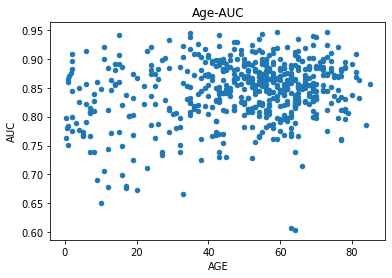

In [192]:
age_auc = training[['AGE','AUC']]
age_auc = age_auc.dropna() 
age_auc.plot.scatter(x = 'AGE', y = 'AUC')
plt.title('Age-AUC')

Text(0.5, 1.0, 'Doubling time - AUC')

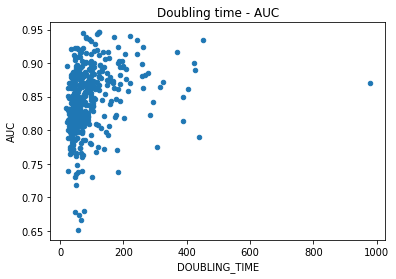

In [149]:
doub_auc = training[['DOUBLING_TIME','AUC']]
doub_auc = doub_auc.dropna() 
doub_auc.plot.scatter(x = 'DOUBLING_TIME', y = 'AUC')

plt.title('Doubling time - AUC')

Text(0.5, 1.0, 'Ethnicity - AUC')

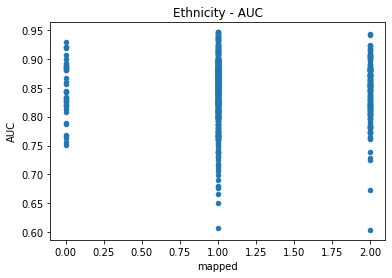

In [151]:
eth_auc = training[['ETHNICITY','AUC']]
eth_auc = eth_auc.dropna() 

#now make an encoding 
levels = {s:i for i,s in enumerate(set(list(eth_auc['ETHNICITY'])))}

eth_auc['mapped'] = eth_auc['ETHNICITY'].apply(lambda x: levels[x])
eth_auc.plot.scatter(x = 'mapped', y = 'AUC')

plt.title('Ethnicity - AUC')

Text(0.5, 1.0, 'Age - Mutation Rate')

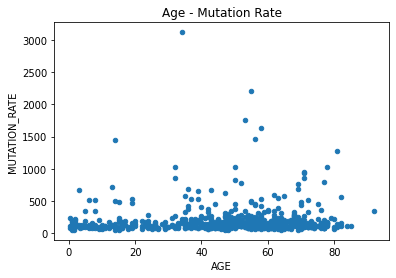

In [152]:
age_mut = training[['AGE','MUTATION_RATE']]
age_mut = age_mut.dropna() 
age_mut.plot.scatter(x = 'AGE', y = 'MUTATION_RATE')

plt.title('Age - Mutation Rate')

<ipython-input-191-59ea96ecb667>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sex_auc['SEX'] = sex_auc['SEX'].apply(lambda x: np.nan if x not in sexes else x)


Text(0.5, 1.0, 'SEX - AUC')

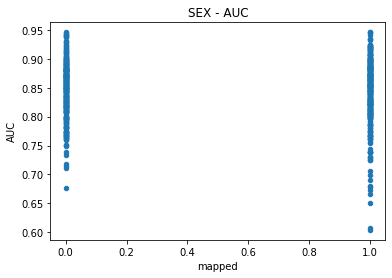

In [191]:
sex_auc = training[['SEX','AUC']]
sexes = ['Male', 'Female']

sex_auc['SEX'] = sex_auc['SEX'].apply(lambda x: np.nan if x not in sexes else x)
sex_auc = sex_auc.dropna() 

#now make an encoding 
levels = {s:i for i,s in enumerate({'Male', 'Female'})}
sex_auc['mapped'] = sex_auc['SEX'].apply(lambda x: levels[x])

sex_auc.plot.scatter(x = 'mapped', y = 'AUC')

plt.title('SEX - AUC')

In [197]:
np.corrcoef(age_mut['AGE'].to_numpy(), age_mut['MUTATION_RATE'].to_numpy())

array([[1.        , 0.02054092],
       [0.02054092, 1.        ]])